In [2]:
from pyspark.sql import SparkSession

### Create 1 spark session, now can access spark UI 

In [4]:
spark = SparkSession.builder.appName("Recommendation System").getOrCreate()

Download data: flights.csv from [HERE](https://www.kaggle.com/code/miquar/explore-flights-csv-airports-csv-airlines-csv/data)

In [5]:
df = spark.read.option("header", "True").csv("data/flights.csv")
df.show()

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

### Get sparkContext from SparkSession 
1 spark context might have multiple session 

In [ ]:
sc = spark.sparkContext # 

### View numbers of cores

In [ ]:
import multiprocessing

# cach 1: Số cores trên driver node
print(multiprocessing.cpu_count())
# Số cores Spark đang sử dụng
print(spark.sparkContext.defaultParallelism) # the number of cores in a cluster
# Số cores mỗi executor
print(spark.sparkContext.getConf().get("spark.executor.cores"))
# Tổng số executors
print(spark.sparkContext.getConf().get("spark.executor.instances"))

8
8
None
None


### View spark config

In [ ]:
sc.getConf().getAll()

[('spark.app.startTime', '1764367016313'),
 ('spark.rdd.compress', 'True'),
 ('spark.hadoop.fs.s3a.vectored.read.min.seek.size', '128K'),
 ('spark.app.submitTime', '1764366923871'),
 ('spark.executor.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-modules=jdk.incubator.vector --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=AL

### 1. File formats:


### 2. Lazy Evaluation: 
Job won’t start until the action is triggered.
- Actions: 
    - df.count()
    - df.collect()
    - df.show()
    - display(df)

### 3. Transformations
- Narrow transformation: does not cause shuffle
    - select 
    - filter
    - cast
    - union 
- Wide transformation: causes shuffle (need to summarize data from different partitions)
    - distinct
    - groupBY
    - sort
    - joint 

### 4. Optimization Techniques:

4.1 Numbers of stages: count(wide trans) + 1 
- shuffle Write: 

### 4.2. Adaptive Query Execution
Enable or not: allow auto optimize update query to run faster: 
- Automatically adjust the numbers of shuffle partitions 
- Automatically adjust optimized join
- Process data skew

In [8]:
spark.conf.get("spark.sql.adaptive.enabled") # set("spark.sql.adaptive.enabled", "True")

'true'

### 4.3. Predicate push down: (Automatically)
This feature in spark pushes down the filtering to the datasource, reducing the number of rows returned to the spark reader from the source database via SELECT/FILTER/WHERE. 

### 4.4. Spark Caching and best practices


In [ ]:
df.cache() # note that next time thì cache (vì nó lazy)
df.count() # this action thì RDD sẽ đc cache 
df.unpersist() # Remove RDD from cache 

### 4.5. Memory partitioning guidelines:


1. The number of partitions

Regardless of cluster size, the best practice for initial memory partitioning is between 128 MB and 1 GB.

In [39]:
# In order to get the number of partitions, you can use the following method,
df.rdd.getNumPartitions()

1

2. The default shuffle partition: 
- park.sql.shuffle.partitions
    - How many partitions created after each shuffle
    - Each time shuffle → Spark creates 200 partitions → 200 tasks in the next stage.

In [ ]:
# numbers of partions after each shuffle
print(f"spark.sql.shuffle.partitions: {spark.conf.get('spark.sql.shuffle.partitions')}")# set("", "20000")
# Max partition by bytes: # 134217728b = 128 MB
print(f"spark.sql.files.maxPartitionBytes: {spark.conf.get('spark.sql.files.maxPartitionBytes') }") 


spark.sql.shuffle.partitions: 200
spark.sql.files.maxPartitionBytes: 134217728b


3. Repartitioning: 
    - reparation: can increase/decrease the numbers of partitions, but shuffle all data
    - coalesce: only decrease partitions, no shuffle, try to repartion in own node 

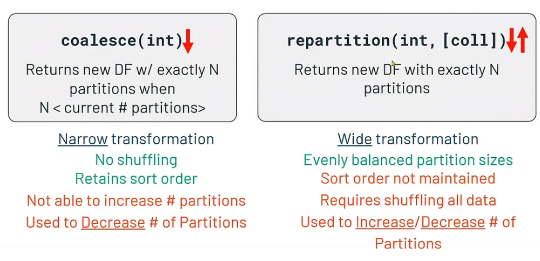

6. Join strategies:

### Stop current session, now cannot access spark UI anymore 

In [40]:
spark.stop()

In [6]:
spark.sparkContext._jvm.java.lang.management.ManagementFactory.getRuntimeMXBean().getName()
    

'9236@Surface'